In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection and Analysis


In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.shape

(768, 9)

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
#Checking for duplicates
num = data.duplicated().sum()
num

0

In [15]:
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [17]:
#Dropping data points with more than 14 pregnancies
data = data[data['Pregnancies'] < 14]
data.shape

(764, 9)

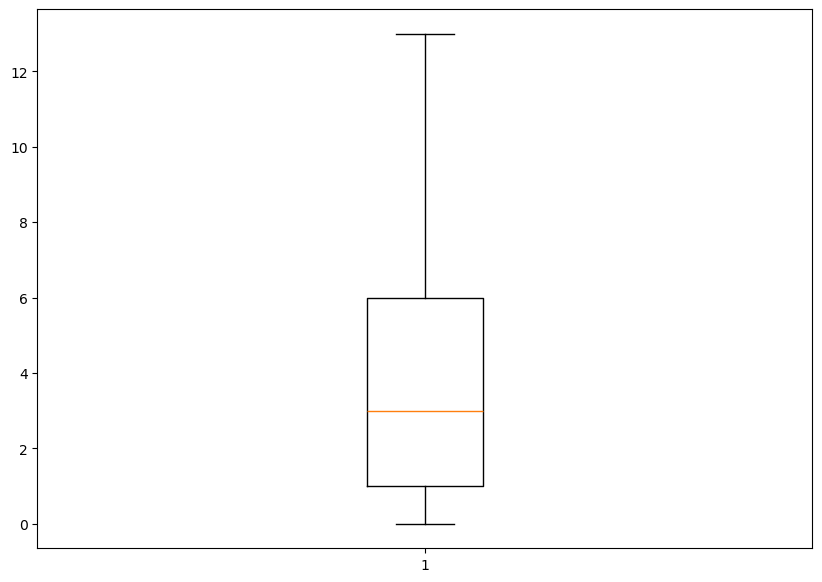

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data["Pregnancies"])
plt.show()

In [22]:
#Separating data
X = data.drop('Outcome',axis=1)
Y = data['Outcome']

In [23]:
X.shape

(764, 8)

## Stadardization

In [24]:
scalar = StandardScaler()

In [26]:
scalar.fit(X)

StandardScaler()

In [27]:
standardized_data = scalar.transform(X)

In [28]:
standardized_data

array([[ 0.67550897,  0.8527345 ,  0.14966318, ...,  0.20711476,
         0.46692355,  1.43002178],
       [-0.85047818, -1.1206208 , -0.15978924, ..., -0.68021178,
        -0.36590113, -0.18603086],
       [ 1.28590383,  1.94904299, -0.26294005, ..., -1.09852286,
         0.60271018, -0.10097546],
       ...,
       [ 0.37031154,  0.0070108 ,  0.14966318, ..., -0.73091615,
        -0.68575409, -0.27108626],
       [-0.85047818,  0.1636263 , -0.46924167, ..., -0.23654851,
        -0.3719361 ,  1.17485557],
       [-0.85047818, -0.870036  ,  0.04651237, ..., -0.19852023,
        -0.47453044, -0.86647407]])

In [29]:
X = standardized_data

In [30]:
X

array([[ 0.67550897,  0.8527345 ,  0.14966318, ...,  0.20711476,
         0.46692355,  1.43002178],
       [-0.85047818, -1.1206208 , -0.15978924, ..., -0.68021178,
        -0.36590113, -0.18603086],
       [ 1.28590383,  1.94904299, -0.26294005, ..., -1.09852286,
         0.60271018, -0.10097546],
       ...,
       [ 0.37031154,  0.0070108 ,  0.14966318, ..., -0.73091615,
        -0.68575409, -0.27108626],
       [-0.85047818,  0.1636263 , -0.46924167, ..., -0.23654851,
        -0.3719361 ,  1.17485557],
       [-0.85047818, -0.870036  ,  0.04651237, ..., -0.19852023,
        -0.47453044, -0.86647407]])

### Train and Test split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, stratify=Y, random_state=2)

In [34]:
x_train.shape, x_test.shape

((611, 8), (153, 8))

### Training the model

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

### Model evaluation

In [37]:
# Accuracy score for training data
x_train_prediction = classifier.predict(x_train)

In [40]:
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy # Accuracy score of training data

0.7708674304418985

In [41]:
#Evaluation on test data
x_test_prediction = classifier.predict(x_test)


In [43]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
testing_data_accuracy # Accuracy score for test data

0.803921568627451

### Checking if other kernel function gives more accuracy 

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    scores = cross_val_score(svm, x_train, y_train, cv=5)
    print(f"Kernel: {kernel}, Accuracy: {scores.mean():.2f}")


Kernel: linear, Accuracy: 0.77
Kernel: poly, Accuracy: 0.74
Kernel: rbf, Accuracy: 0.75
Kernel: sigmoid, Accuracy: 0.73


## Checking with other metrices

In [45]:

from sklearn.metrics import classification_report

# Assuming y_test are your true labels and y_pred are your predicted labels
print(classification_report(y_test, x_test_prediction))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       100
           1       0.77      0.62      0.69        53

    accuracy                           0.80       153
   macro avg       0.79      0.76      0.77       153
weighted avg       0.80      0.80      0.80       153



### Improving recall score

In [46]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(x_train_res, y_train_res)

y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       100
           1       0.67      0.81      0.74        53

    accuracy                           0.80       153
   macro avg       0.78      0.80      0.79       153
weighted avg       0.81      0.80      0.80       153

